In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings 
warnings.filterwarnings('ignore')

Q1: What’s the difference between logistic and linear regression?

    We use linear regression in order to predict continuous
    dependent variables such as: age, height, and weight. 
    On the other hand, we use logistic regression to predict
    categorical variables such as: gender, traffic lights, and education level. 

Q2: What’s the difference between predictors and response variables?

    The difference is that we use predictors to predict response variables.
    At the same time, response variable is a variable that we are attempting to predict. 

Q3: What is the purpose and benefits of preprocessing data?

    The purpose of preprocessing the data is to normalize it by checking for the missing values,
    noisy data, and removing the outliers. In a simple way it is about cleaning the data 
    in order to minimize the inaccuracies for future predictions. 
    The benefit of it is that we will create better model with minimum errors that will 
    provide us with the accurate results. 

Q4: What is overfitting and underfitting that data? What are the consequences.

    Overfitting means that AI model tries to learn too much from the existing dataset. 
    The problem with that is when the new training data occurs in the dataset the model might 
    fail to perform as it performed earlier without this new training data. 
    Example: You are very good at playing tennis in the right hand and you master it. But when 
    they ask you to play with the left hand you lose immediatly. 
    
    Underfitting means that AI model has very high bias towards and it fails to find the patterns of the data. 
    Example: You are playing tennis and you are not good at either playing with the right hand 
    nor playing with the left hand. 

Q6: Which features would you classify as categorical vs. continuous? Explain. 

    Categorical features would be: anaemia, diabetes, high blood pressure, sex, smoking, death event. 
    Continuous features would be: age, creatinine phosphokinase, ejection fraction, platelets, serum creatinine, 
    serum sodium, and time. 
    
    In order for it to be categorical the attribute should be nominal or ordinal
    by ordinal categorical variable means, so it can be ordered: S < M < L 
    by nominal categorical variable means, that it cannot be ordered because no relationship: Green !> Red
    In contrast for it to be coninuous it should have a finite number of categories such as: 
    age, weight, and height. 

Q7: Write a small paragraph (3-6 sentences) discussing the significance of 
    addressing this issue and the benefits your model can provide.
    
    We have a big dataset in our hands that has over 299 rows. I will create a model 
    that will effectively predict whether the person will survive or not based on the features
    in the dataset. I will try to explain it in mathematical terms as well as visually. 
    By creating multiple plots to compare each feature to each other and the outcome of it. 

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Good news we don't have any missing values in this dataset. As well as no null values. 

In [4]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

We have 47 unique values in age column. 
We have 2 unique values in anaemia column.
We have 208 unique values in creatinine_phosphokinase column.
We have 2 unique values in diabetes column.
We have 17 unique values in ejection_fraction column.
We have 2 unique values in high_blood_pressure column.
We have 176 unique values in platelets column.
We have 40 unique values in serum_creatinine column.
We have 27 unique values in serum_sodium column.
We have 2 unique values in sex column.
We have 2 unique values in smoking column.
We have 148 unique values in time column.
We have 2 unique values in Death_event column.

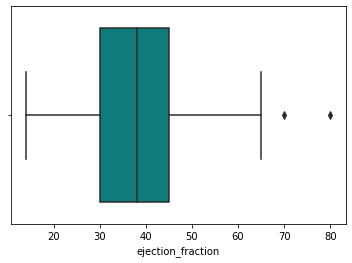

In [5]:
sns.boxplot(x='ejection_fraction', color='#008B8B', data = df)
plt.show()

This plot tells us that the median of the feature ejection_fraction
are in the range of 30-45. As well as having minimum at 14 and maximum at 62. 
We do have two outliers that are 70 and 80. We will keep those two outliers because it's important for our dataset.

In [6]:
df['ejection_fraction'].unique()

array([20, 38, 40, 15, 60, 65, 35, 25, 30, 50, 14, 55, 45, 62, 80, 17, 70],
      dtype=int64)

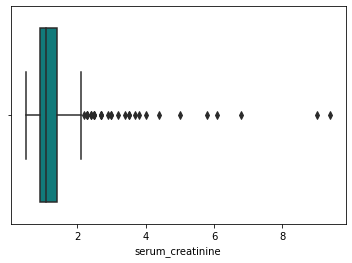

In [7]:
sns.boxplot(x='serum_creatinine', color='#008B8B', data = df)
plt.show()

In [8]:
df['serum_creatinine'].unique()

array([1.9 , 1.1 , 1.3 , 2.7 , 2.1 , 1.2 , 1.5 , 9.4 , 4.  , 0.9 , 1.  ,
       0.8 , 1.6 , 1.83, 5.8 , 3.  , 3.5 , 2.3 , 0.6 , 4.4 , 1.4 , 6.8 ,
       2.2 , 2.  , 1.18, 2.9 , 0.7 , 1.7 , 2.5 , 1.8 , 3.2 , 0.75, 3.7 ,
       3.4 , 6.1 , 2.4 , 9.  , 5.  , 0.5 , 3.8 ])

In our second boxplot for serum_creatinine the median is around 1.3 - 1.7. 
With the minimum of 0.8 and maximum at 2.2. Compared to ejection_fraction feature we have a lot outliers in this dataset. 
We also going to keep them as there is many of them and it will affect on the accuracy. 

Both boxplots are different from each other in terms of number of outliers, min & max, and number of values in them. 

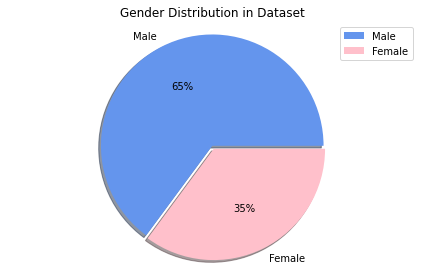

In [9]:
plt.pie(df['sex'].value_counts(), labels=['Male','Female'], colors=['Cornflowerblue','Pink'], counterclock=True, autopct='%1.0f%%', shadow=True,
        explode=[0,0.03])
plt.legend()
plt.title('Gender Distribution in Dataset')
plt.axis('equal')
plt.tight_layout()
plt.show()

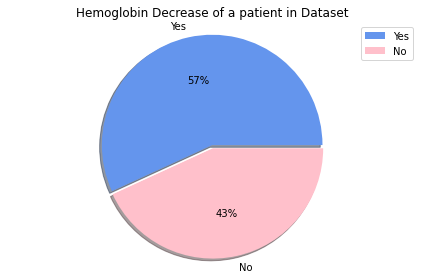

In [10]:
plt.pie(df['anaemia'].value_counts(), labels=['Yes','No'], colors=['Cornflowerblue','Pink'], counterclock=True, autopct='%1.0f%%', shadow=True,
        explode=[0,0.03])
plt.legend()
plt.title('Hemoglobin Decrease of a patient in Dataset')
plt.axis('equal')
plt.tight_layout()
plt.show()

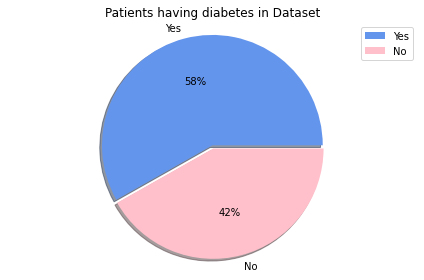

In [11]:
plt.pie(df['diabetes'].value_counts(), labels=['Yes','No'], colors=['Cornflowerblue','Pink'], counterclock=True, autopct='%1.0f%%', shadow=True,
        explode=[0,0.03])
plt.legend()
plt.title('Patients having diabetes in Dataset')
plt.axis('equal')
plt.tight_layout()
plt.show()

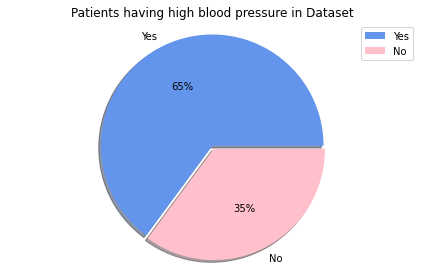

In [12]:
plt.pie(df['high_blood_pressure'].value_counts(), labels=['Yes','No'], colors=['Cornflowerblue','Pink'], counterclock=True, autopct='%1.0f%%', shadow=True,
        explode=[0,0.03])
plt.legend()
plt.title('Patients having high blood pressure in Dataset')
plt.axis('equal')
plt.tight_layout()
plt.show()

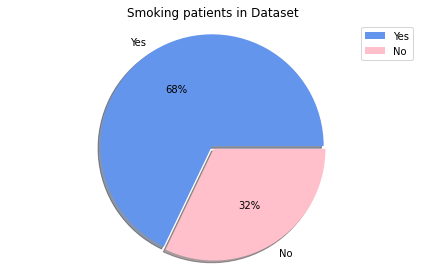

In [13]:
plt.pie(df['smoking'].value_counts(), labels=['Yes','No'], colors=['Cornflowerblue','Pink'], counterclock=True, autopct='%1.0f%%', shadow=True,
        explode=[0,0.03])
plt.legend()
plt.title('Smoking patients in Dataset')
plt.axis('equal')
plt.tight_layout()
plt.show()

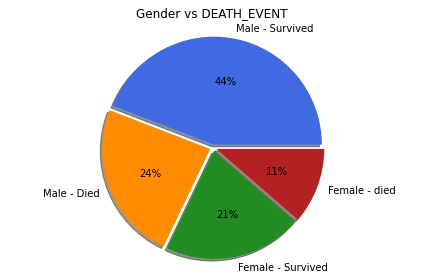

In [14]:
plt.pie(df[['sex', 'DEATH_EVENT']].value_counts(), labels=['Male - Survived', 'Male - Died', 'Female - Survived', 'Female - died'], colors=['royalblue','darkorange','forestgreen','firebrick'], counterclock=True, autopct='%1.0f%%', shadow=True,
        explode=[0.03,0.03,0.03,0.03])
plt.title('Gender vs DEATH_EVENT')
plt.axis('equal')
plt.tight_layout()
plt.show()

After observing each plot I came to the conclusion that majority of the patients had multiple problems
that include things such as: high blood pressure, smoking, diabetes, and decrease of hemoglobin. 

Working with balanced dataset is important because even though our accuracy might not be great, but our 
overall understanding of the data will be better. Also, balanced data means that we don't have to deal 
with noisy data which makes our predictions easier. 

The easiest method to deal with the imbalanced dataset is resampling. It means to add more samples into
the minor dataset in that way we can make our data equal which means that it will become balanced. 

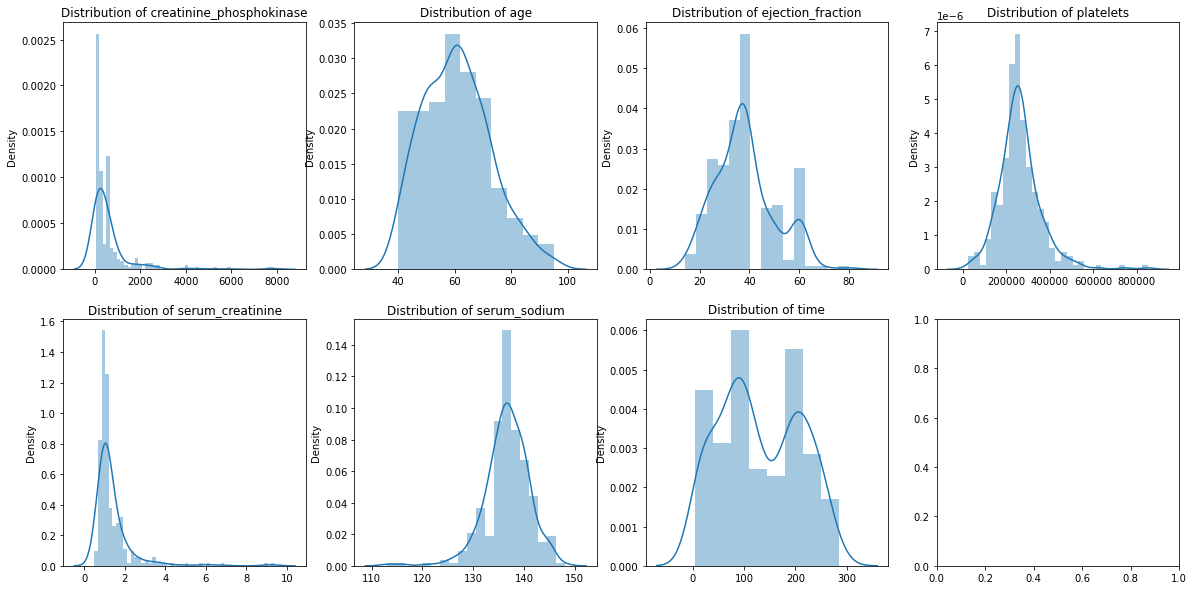

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

###Part 1
sns.distplot(df['creatinine_phosphokinase'], ax=axes[0][0])
axes[0][0].set_title("Distribution of creatinine_phosphokinase")
axes[0][0].set_xlabel("")

sns.distplot(df['age'], ax=axes[0][1])
axes[0][1].set_title("Distribution of age")
axes[0][1].set_xlabel("")

sns.distplot(df['ejection_fraction'], ax=axes[0][2])
axes[0][2].set_title("Distribution of ejection_fraction")
axes[0][2].set_xlabel("")

sns.distplot(df['platelets'], ax=axes[0][3])
axes[0][3].set_title("Distribution of platelets")
axes[0][3].set_xlabel("")

###Part 2
sns.distplot(df['serum_creatinine'], ax=axes[1][0])
axes[1][0].set_title("Distribution of serum_creatinine")
axes[1][0].set_xlabel("")

sns.distplot(df['serum_sodium'], ax=axes[1][1])
axes[1][1].set_title("Distribution of serum_sodium")
axes[1][1].set_xlabel("")

sns.distplot(df['time'], ax=axes[1][2])
axes[1][2].set_title("Distribution of time")
axes[1][2].set_xlabel("")

plt.show()

1) Creatinine_phosphokinase shows us the highest peaks are in between 0-800
2) Age distribution majority of it between 40-70
3) Ejection_fraction peaks are from 20-40 and then there is a gap. Another peak at 60. 
4) Plateles in the body for most patients around 200,000-350,000.
5) Serum_creatinine in the blood is mostly around 0.2-2. 
6) Serum_sodium distribution is in between 130-145. 
7) Time most peaks at 100 and 200. 

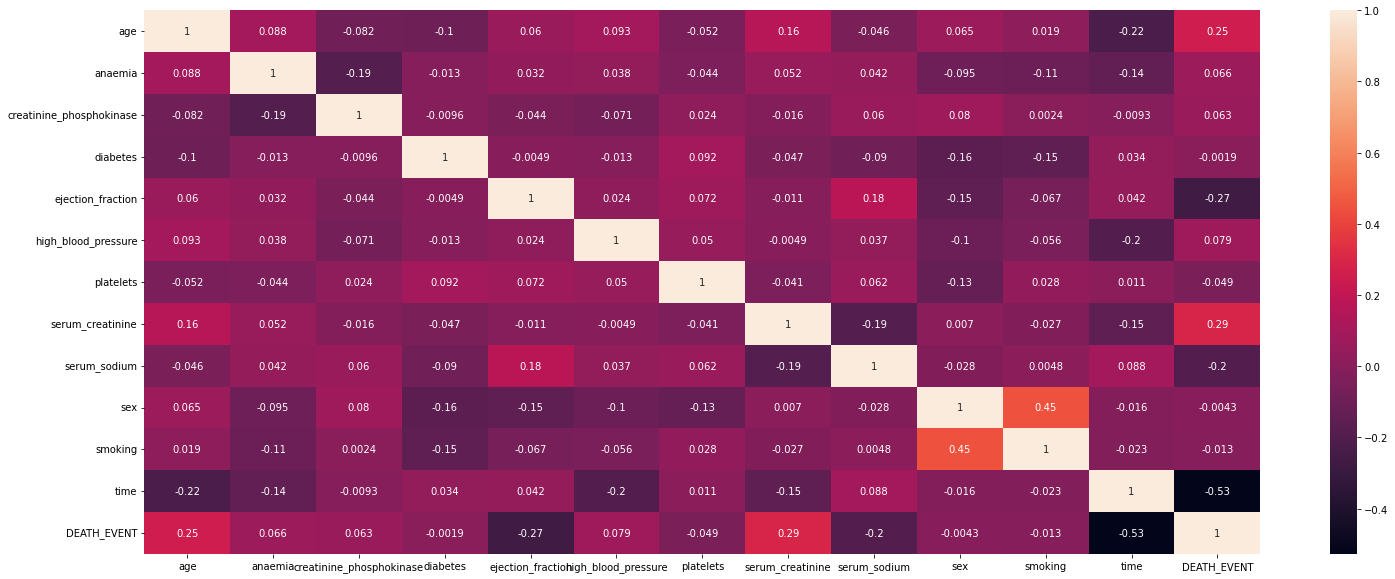

In [16]:
fig, axes = plt.subplots(figsize=(25, 10)) 

ax = sns.heatmap(df.corr(), annot=True)
ax.tick_params(axis='x',rotation=360)
plt.show()

If we make our analysis based on this datasets heatmap it tells us whether we have a correlation between 
two features which we can combine into one feature. 

Multicollinearity is when two or more independent features are higly correlated to each other in the regression model. 
Based on my observation there is no multicollinearity in our dataset. 
It is important to know whether there is a multicollinearity because it will reduce the dimensionality of the data. 
I checked based on the colors of the cells. When two features are multicollinear it reflects being almost that
both of these features are almost identical color. 

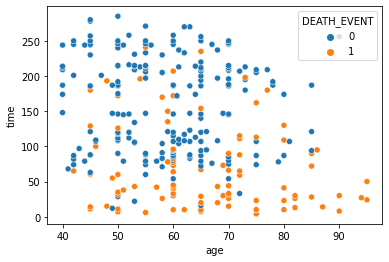

In [17]:
sns.scatterplot(x = 'age', y = 'time', hue='DEATH_EVENT', data = df)
plt.show()

Most people that ended up dying based on the 50 day follow-ups. 
Also, most of these people were at the age of 60 and older. 

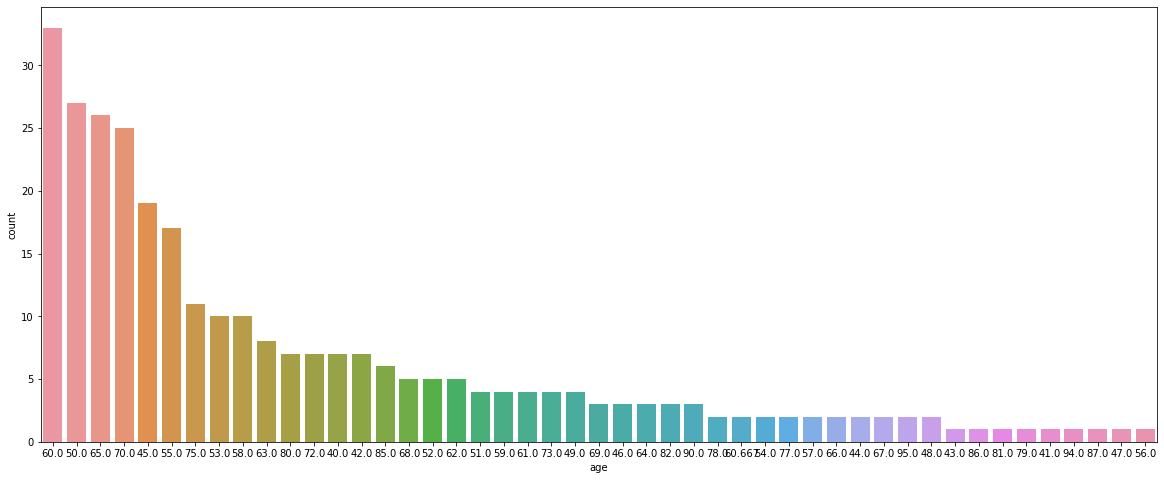

In [18]:
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='age', order=df['age'].value_counts().index)
plt.show()

Another point to mention is that most of our patients are in the age of 45-75. 

It is necessary to scale the data because range of values in each features varies significantly from 
one another. Scaling helps all the values to be in the same range depending on the scaling technique.

Benefit of scaling the data is that it will stablize the training process when fitting the model.  
And it makes training time faster because it is already been seperated into the equal range. 

For this dataset I decided to use Robust Scaler. Yes, both features and response variables are scaled. 

In [19]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_df = scaler.fit_transform(df)

scaled = pd.DataFrame(data=scaled_df , columns=df.columns)

X = scaled.drop(labels='DEATH_EVENT', axis=1)
y = scaled['DEATH_EVENT']

In [20]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.789474,0.0,0.713212,0.0,-1.2,1.0,0.032967,1.6,-1.166667,0.0,0.0,-0.853846
1,-0.263158,0.0,16.350161,0.0,0.0,0.0,0.014923,0.0,-0.166667,0.0,0.0,-0.838462
2,0.263158,0.0,-0.223416,0.0,-1.2,0.0,-1.098901,0.4,-1.333333,0.0,1.0,-0.830769
3,-0.526316,1.0,-0.298604,0.0,-1.2,0.0,-0.571429,1.6,0.000000,0.0,0.0,-0.830769
4,0.263158,1.0,-0.193340,1.0,-1.2,0.0,0.714286,3.2,-3.500000,-1.0,0.0,-0.823077


In [21]:
from sklearn.model_selection import train_test_split

X = scaled.drop(labels='DEATH_EVENT', axis=1)
y = scaled['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

All the columns well modified and don't need any additional work. 

Parametric learning algorithm is when you training the data to fit into the model. 
Examples: Linear regression and Neural Network.
    
Non-parametric learning algorithm is about classification and clustering the data. 
Examples: KNN and LDA

The model that I'm choosing is parametric. Because linear regression is considered supervised learning 
and supervised learning algorithms considered as parametric. 

We use label encoding when we have features that are ordinal. 
At the same time we use one hot encoding when we have nominal features. 

When using label encoding it labels features based on the hierarchy approach. 
Example: S > M > L : 0, 1, 2 
When using one hot encoding it labels features by creating dummy variables. 
Example: S > M > L : 0 1 2
                     1 0 0
                     0 1 0
                     0 0 1

In [22]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

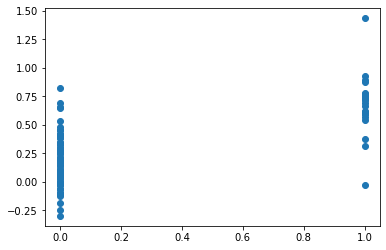

In [23]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.show()

In [24]:
from sklearn.metrics import r2_score
print('R-squared: ', r2_score(y_test, predictions))

R-squared:  0.4378231172261392


In [25]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=500, activation='relu')
mlp.fit(X_train,y_train)

MLPClassifier(max_iter=500)

In [26]:
predictions = mlp.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[59  6]
 [ 4 21]]
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92        65
         1.0       0.78      0.84      0.81        25

    accuracy                           0.89        90
   macro avg       0.86      0.87      0.86        90
weighted avg       0.89      0.89      0.89        90



In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
predictions1 = knn.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))

[[53 12]
 [12 13]]
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        65
         1.0       0.52      0.52      0.52        25

    accuracy                           0.73        90
   macro avg       0.67      0.67      0.67        90
weighted avg       0.73      0.73      0.73        90



I picked these two models because, I wanted to see how parametric and non-parametric will work on these dataset. 

In [31]:
from sklearn.model_selection import cross_val_score

# Applying 10 Fold Cross Validation
scores = cross_val_score(mlp, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross validation scores:{}'.format(scores))

# compute Average cross validation score
print('\nAverage cross validation score: {:.4f}'.format(scores.mean()))

Cross validation scores:[0.71428571 0.66666667 0.76190476 0.85714286 0.80952381 0.71428571
 0.76190476 0.95238095 0.71428571 0.65      ]

Average cross validation score: 0.7602


In [32]:
from sklearn.model_selection import cross_val_score

# Applying 10 Fold Cross Validation
scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross validation scores:{}'.format(scores))

# compute Average cross validation score
print('\nAverage cross validation score: {:.4f}'.format(scores.mean()))

Cross validation scores:[0.42857143 0.57142857 0.80952381 0.61904762 0.9047619  0.71428571
 0.66666667 0.71428571 0.76190476 0.6       ]

Average cross validation score: 0.6790


<AxesSubplot:>

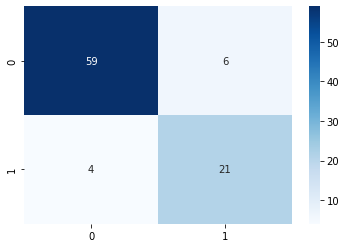

In [33]:
sns.heatmap(confusion_matrix(y_test,predictions), cmap="Blues", annot=True)

<AxesSubplot:>

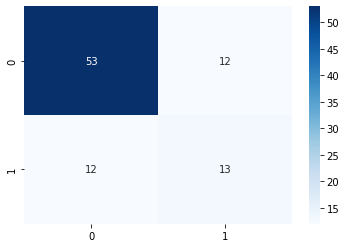

In [34]:
sns.heatmap(confusion_matrix(y_test,predictions1), cmap="Blues", annot=True)

In conclusion my models show pretty good cross_val_score accuracy for both KNN 0.68 and LinearRegressoin 0.76. 
Cross_val_score shows us the R^2 value the closer the value is to 1 the better fit the model is. 
It is significant because based on the model we will now whether we constructed good model or not. 
Accuracy for KNN was 0.68 while accuracy for LinearRegression was 0.76. 
I think, I can try testing it using different models to make deeper research. 